In [1]:
# Random Forest Can be use for regression as well as for classifier 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


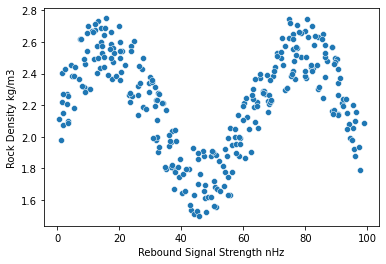

In [6]:
sns.scatterplot(data=df , x='Rebound Signal Strength nHz', y='Rock Density kg/m3');

In [7]:
X=df.drop('Rock Density kg/m3',axis=1)
y=df['Rock Density kg/m3']

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree = 3)

In [10]:
X.shape

(300, 1)

In [11]:
X = poly.fit_transform(X)

In [12]:
X.shape

(300, 4)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test )

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor(  n_estimators = 10)
model.fit(X_train , y_train)

RandomForestRegressor(n_estimators=10)

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [22]:
np.sqrt(mean_squared_error(y_test,pred))

0.1439399246830437

In [23]:
mean_absolute_error(y_test,pred)

0.11763370049024083

In [24]:
# to choose the best value for n_estimators a loop created
smse=[]
mae=[]
for n in range(1 , 20):
    model = RandomForestRegressor(  n_estimators = n)
    model.fit(X_train , y_train)
    pred = model.predict(X_test)
    smse.append(np.sqrt(mean_squared_error(y_test,pred)))
    mae.append(mean_absolute_error(y_test,pred))

In [25]:
smse.index(min(smse))

13

In [26]:
# as the index starts from 0 so the best  n_estimators = location of best smse +1 = 8

In [27]:
mae.index(min(mae))

8

In [28]:
# same like in sqrt(mean_squared_error)